# Praca domowa nr 2 
## Adam Niewiadomski
## Indeks 116961
## Grupa wtorek 15:20 

In [10]:
import gzip
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import struct
from urllib.request import urlretrieve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [2]:
def try_download(dataurl, labelsurl, num):
    data = read_images(dataurl, num)
    labels = read_labels(labelsurl, num)
    return np.hstack((data, labels))

def read_labels(url, num):
    gzfname, h = urlretrieve(url, './delete.me')
    with gzip.open(gzfname) as gz:
        n = struct.unpack('I', gz.read(4))
        n = struct.unpack('>I', gz.read(4))
        res = np.fromstring(gz.read(num), dtype = np.uint8)

    return res.reshape((num, 1))

def read_images(url, num):
    gzfname, h = urlretrieve(url, './delete.me')
    with gzip.open(gzfname) as gz:
        n = struct.unpack('I', gz.read(4))
        n = struct.unpack('>I', gz.read(4))[0]
        crow = struct.unpack('>I', gz.read(4))[0]
        ccol = struct.unpack('>I', gz.read(4))[0]
        res = np.fromstring(gz.read(num * crow * ccol), dtype = np.uint8)
    return res.reshape((num, crow * ccol))

In [3]:
#odnosniki url do paczek danych:
url_imgte = 'http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz'
url_lbte = 'http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz'
url_imgtr = 'http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz'
url_lbtr = 'http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz'
#liczba obs na zb. treningowym:
num_tr = 60000
#lb obs. na zb. testowym:
num_te = 10000
train = try_download(url_imgtr, url_lbtr, num_tr)
test = try_download(url_imgte, url_lbte, num_te)

train_image = train[:,:-1]
train_label = train[:,-1]
test_image = test[:,:-1]
test_label = test[:,-1]

train_image.shape

<ipython-input-2-aa3b3228cee1>:22: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  res = np.fromstring(gz.read(num * crow * ccol), dtype = np.uint8)
<ipython-input-2-aa3b3228cee1>:11: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  res = np.fromstring(gz.read(num), dtype = np.uint8)


(60000, 784)

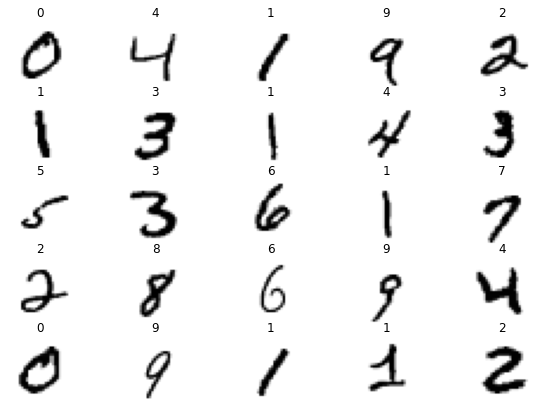

In [4]:
fig = plt.figure(figsize=(10,7))
rows = 5
columns = 5 

for i in range(1,columns*rows + 1):
    fig.add_subplot(rows,columns,i)
    plt.imshow(train[i,:-1].reshape(28,28), cmap="gray_r")
    plt.title(train[i,-1])
    plt.axis('off')
plt.show()


In [5]:
model = KNeighborsClassifier(n_neighbors=1, n_jobs=4)
model.fit(train_image, train_label)

KNeighborsClassifier(n_jobs=4, n_neighbors=1)

In [7]:
%time y =  model.predict(test_image)

Wall time: 28.1 s


In [8]:
print(y)
print(test_label)

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


In [11]:
print(accuracy_score(y, test_label))


0.9691
